# Tanzania Water - Ternery Classifier Problem

This notebook contains the working code for the models and vizualisations used for the project. The aim of the project is to predict the functionality status ('functional', 'functional needs repair', and 'non-functional') of water wells in Tanzania. The dataset used is the 'df_clean.csv' file located in the repository, which is a cleaned version of the data obtained from the Driven Data website. 

First, a baseline model was created using a Decision Tree Classifier. This was then compared to a three other models: a Random Forest Classifier, an Adaptive Boosting Classifier, and a Gradient Boosting Classifier.

## Summary of Results

# INSERT RESULTS SUMMARY HERE!!!

First, the relevant libraries are imported and the dataframe is read and inspected.

In [136]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [137]:
# loading and reading data
df = pd.read_csv('df_clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount_tsh        59400 non-null  float64
 1   funder            59400 non-null  object 
 2   installer         59400 non-null  object 
 3   gps_height        59400 non-null  float64
 4   longitude         59400 non-null  float64
 5   latitude          59400 non-null  float64
 6   basin             59400 non-null  object 
 7   population        59400 non-null  float64
 8   permit            59400 non-null  object 
 9   extraction_type   59400 non-null  object 
 10  management        59400 non-null  object 
 11  management_group  59400 non-null  object 
 12  payment           59400 non-null  object 
 13  quality_group     59400 non-null  object 
 14  quantity          59400 non-null  object 
 15  source            59400 non-null  object 
 16  waterpoint_type   59400 non-null  object

Next, the data is split into predictor and target variables, before dummy variables are encoded for all categorical variables.

In [138]:
# splitting target and predictor variables into separate dataframes
y = df['status_group']
X = df.drop('status_group', axis=1)

In [139]:
# creating dummy columns for categoricals
X_d = pd.get_dummies(X)

Finally, the data is split into training, validation, and testing sets.

In [140]:
X_tv, X_test, y_tv, y_test = train_test_split(X_d, y, test_size=0.25, random_state=16)

In [141]:
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=16)

## Trial 1: Baseline

The baseline model will be a Decision Tree Classifier, run with no hyperparameter optimisation.

In [142]:
# importing relevant libraries
from sklearn.tree import DecisionTreeClassifier

In [143]:
# creating DTC and fitting to training data
tree_clf = DecisionTreeClassifier(random_state=16)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=16, splitter='best')

In [144]:
pred = tree_clf.predict(X_val)

In [145]:
confusion_matrix(y_val,pred)

array([[4783,  367,  843],
       [ 397,  275,  159],
       [ 899,  144, 3271]])

In [146]:
classification_report(y_val,pred)

'                         precision    recall  f1-score   support\n\n             functional       0.79      0.80      0.79      5993\nfunctional needs repair       0.35      0.33      0.34       831\n         non functional       0.77      0.76      0.76      4314\n\n               accuracy                           0.75     11138\n              macro avg       0.63      0.63      0.63     11138\n           weighted avg       0.75      0.75      0.75     11138\n'

In [147]:
accuracy_score(y_val,pred)

0.7478003232178129

In [148]:
forest = RandomForestClassifier(random_state=16)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [149]:
forest.score(X_val,y_val)

0.7931405997486084

In [150]:
feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

longitude                                    0.141811
latitude                                     0.139710
quantity_dry                                 0.072809
gps_height                                   0.070315
age_years                                    0.058274
                                               ...   
extraction_type_cemo                         0.000228
management_other - school                    0.000219
waterpoint_type_dam                          0.000063
extraction_type_climax                       0.000051
extraction_type_other - mkulima/shinyanga    0.000030
Length: 101, dtype: float64

In [151]:
top_30_features = feature_imp[0:30]

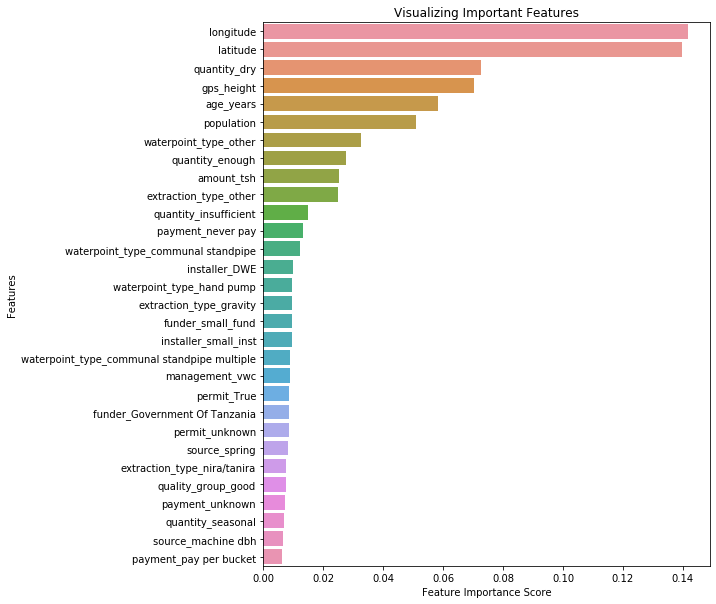

In [152]:
figure_1 = plt.figure(figsize=(8,10))
sns.barplot(x=top_30_features, y=top_30_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()